# Project 3 : RL For Custom Environment
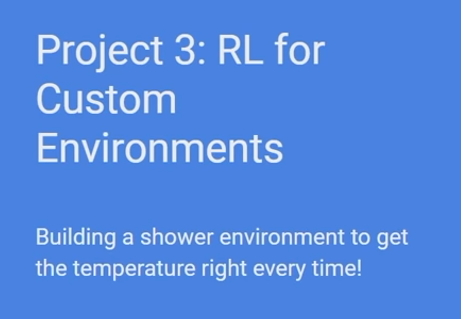

## 1. Import  Dependencies

In [1]:
# Import GYM Stuff
import gym
from gym import Env
from gym.spaces import Discrete , Box , Dict , Tuple , MultiBinary , MultiDiscrete

# Import Helpers
import numpy as np
import random 
import os

# Import Stable Baselines stuff
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

## 2. Types of Spaces

In [2]:
Discrete(3).sample()

1

In [3]:
Box(0,1,shape =(3,3)).sample() # Between 0,1  in shape (3,3)

array([[0.3448409 , 0.56353015, 0.08681253],
       [0.64728886, 0.07649583, 0.56047356],
       [0.7571284 , 0.02111642, 0.2567222 ]], dtype=float32)

In [5]:
Tuple((Discrete(3),Box(0,1,shape=(3,3)))).sample()

(0,
 array([[0.244422  , 0.28653407, 0.5814393 ],
        [0.25801066, 0.7421139 , 0.4683895 ],
        [0.6692253 , 0.22735626, 0.06395853]], dtype=float32))

In [10]:
Dict({'heigh':Discrete(2),"speed":Box(0,100,shape=(1,))}).sample()

OrderedDict([('heigh', 0), ('speed', array([52.522045], dtype=float32))])

In [14]:
MultiBinary(4).sample()

array([0, 0, 0, 1], dtype=int8)

In [19]:
MultiDiscrete([5,2,2]).sample()

array([4, 1, 1], dtype=int64)

## 3. Building an Environment
- Build an agent to give us the best shower possible
- Randomly temprature
- 37 and 39 Degree

In [23]:
class ShowerEnv(Env): # Abstracting super class `Env`
    def __init__(self):
        self.action_space = Discrete(3)
        self.state = 38 + random.randint(-3,3)
        self.shower_length = 60
        self.observation_space = Box(low=np.array([0]),high=np.array([100]))
        
    def step(self,action):
        # Apply temp Adj
        self.state += action-1

        # Decrease shower time
        self.shower_length -= 1
        
        # Calculate Reward
        if self.state >= 37 and self.state <= 39:
            reward = 1
        else:
            reward = -1
            
        if self.shower_length <= 0 :
            done = True
        else:
            done= False

        info = {}
        
        return self.state , reward , done , info

    def render(self):
        # Implement Viz
        pass
        
    def reset(self):
        self.state = np.array(38 + random.randint(-3,3)).astype(float)
        self.shower_length = 60
        return self.state

In [26]:
env = ShowerEnv()
env.observation_space.sample(),env.action_space.sample()

(array([76.02008], dtype=float32), 2)

## 4. Test Environment

In [29]:
episodes = 5  # think of it as one episode of full game
for episode in range(1,episodes+1):
    obs = env.reset()  # reset the agent , action , environment , obsevation , rewards
    done = False
    score = 0
    
    while not done:
        env.render()
        action = env.action_space.sample()  # return random value between (0,1)
        obs,reward , done,info = env.step(action)
        score += reward
        
        # print(f"Action: {action} ,Score: {score} >> Other Infos: n_state {n_state},Reward {reward},Done {done}")
    print(f'Episode: {episode}, Score:{score}')
env.close()

Episode: 1, Score:-50
Episode: 2, Score:-28
Episode: 3, Score:-30
Episode: 4, Score:-52
Episode: 5, Score:-60


## 5. Train Model

In [31]:
log_path = os.path.join("Training","Logs")
model = PPO("MlpPolicy" , env , verbose = 1 , tensorboard_log= log_path)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [32]:
model.learn(total_timesteps=200)

Logging to Training\Logs\PPO_7
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 60       |
|    ep_rew_mean     | -33.6    |
| time/              |          |
|    fps             | 35       |
|    iterations      | 1        |
|    time_elapsed    | 57       |
|    total_timesteps | 2048     |
---------------------------------


## 6. Save Model

In [34]:
ppo_path = os.path.join("Training" , "Saved Models" , "PPO_Shower_Model")
model.save(ppo_path)

In [36]:
evaluate_policy(model,env,n_eval_episodes=10)

(-57.0, 2.7202941017470885)